In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

In [14]:
batch_size = 32
img_height = 224
img_width = 224
epochs = 16
image_shape = (img_height, img_width, 3)
train_path = r"D:\DA\dataset\aug_waste_dataset_balance\taphuanluyen"
test_path = r"D:\DA\dataset\aug_waste_dataset_balance\tapkiemthu"

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

In [16]:
train_data = train_datagen.flow_from_directory(
        train_path,
        target_size=image_shape[:2],
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical',
        subset='training',
        shuffle=True)

val_data = train_datagen.flow_from_directory(
        train_path,
        target_size=image_shape[:2],
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False) 

Found 17959 images belonging to 14 classes.
Found 4483 images belonging to 14 classes.


In [17]:
pretrained_model= InceptionV3(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=14,
                   weights='imagenet')

In [18]:
for layer in pretrained_model.layers:
        layer.trainable=False

In [19]:
#pretrained_model.summary()

In [20]:
last_layer = pretrained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(14 , activation="softmax")(x)
model = Model(pretrained_model.input , x)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000002),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_94 (Conv2D)            │ (None, 111, 111, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_94        │ (None, 111, 111, 32)      │              96 │ conv2d_94[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_94 (Activation)    │ (None, 111, 111, 32)      │               0 │ batch_normalization_94[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_95 (Conv2D)            │ (None, 109, 109, 32)      │           9,216 │ activation_94[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_95        │ (None, 109, 109, 32)      │              96 │ conv2d_95[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_95 (Activation)    │ (None, 109, 109, 32)      │               0 │ batch_normalization_95[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_96 (Conv2D)            │ (None, 109, 109, 64)      │          18,432 │ activation_95[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_96        │ (None, 109, 109, 64)      │             192 │ conv2d_96[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_96 (Activation)    │ (None, 109, 109, 64)      │               0 │ batch_normalization_96[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 54, 54, 64)        │               0 │ activation_96[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_97 (Conv2D)            │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_97        │ (None, 54, 54, 80)        │             240 │ conv2d_97[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_97 (Activation)    │ (None, 54, 54, 80)        │               0 │ batch_normalization_97[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_98 (Conv2D)            │ (None, 52, 52, 192)       │         138,24

 Total params: 122,236,846 (466.30 MB)

 Trainable params: 113,261,582 (432.06 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [24]:
history = model.fit(train_data, epochs=epochs, validation_data=val_data, callbacks=[early_stop])

Epoch 1/16
562/562 ━━━━━━━━━━━━━━━━━━━━ 1229s 2s/step - accuracy: 0.3851 - loss: 2.0478 - val_accuracy: 0.7107 - val_loss: 1.0580
Epoch 2/16
562/562 ━━━━━━━━━━━━━━━━━━━━ 1629s 3s/step - accuracy: 0.7645 - loss: 0.8894 - val_accuracy: 0.7890 - val_loss: 0.7563
Epoch 3/16
562/562 ━━━━━━━━━━━━━━━━━━━━ 1119s 2s/step - accuracy: 0.8522 - loss: 0.5902 - val_accuracy: 0.8278 - val_loss: 0.6227
Epoch 4/16
562/562 ━━━━━━━━━━━━━━━━━━━━ 1330s 2s/step - accuracy: 0.9073 - loss: 0.4238 - val_accuracy: 0.8421 - val_loss: 0.5469
Epoch 5/16
562/562 ━━━━━━━━━━━━━━━━━━━━ 1081s 2s/step - accuracy: 0.9430 - loss: 0.3180 - val_accuracy: 0.8592 - val_loss: 0.4862
Epoch 6/16
562/562 ━━━━━━━━━━━━━━━━━━━━ 1443s 3s/step - accuracy: 0.9628 - loss: 0.2396 - val_accuracy: 0.8735 - val_loss: 0.4422
Epoch 7/16
562/562 ━━━━━━━━━━━━━━━━━━━━ 1169s 2s/step - accuracy: 0.9774 - loss: 0.1881 - val_accuracy: 0.8793 - val_loss: 0.4068
Epoch 8/16
562/562 ━━━━━━━━━━━━━━━━━━━━ 1458s 3s/step - accuracy: 0.9891 - loss: 0.1452 - 

In [25]:
model.save('trash_classification_inceptionv3.keras')

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
losses = pd.DataFrame(model.history.history)

<Axes: >

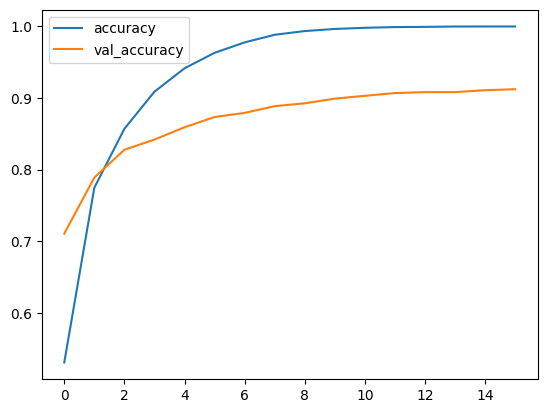

In [28]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

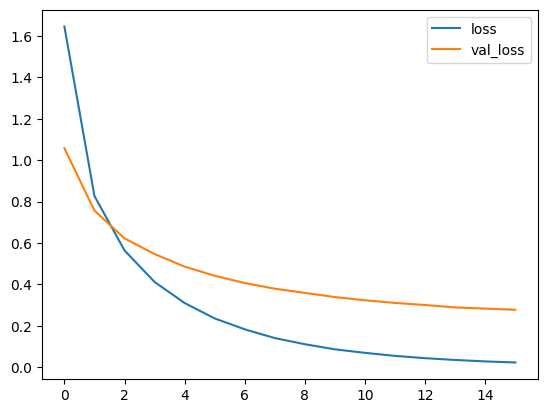

In [29]:
losses[['loss','val_loss']].plot()

In [30]:
model.metrics_names

['loss', 'compile_metrics']

In [31]:
test_data = train_datagen.flow_from_directory(
        test_path,
        target_size=image_shape[:2],
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False) 

Found 6006 images belonging to 14 classes.


In [32]:
model.evaluate(test_data)

188/188 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.7974 - loss: 0.6606   


[0.6426131129264832, 0.8023642897605896]

In [33]:
pred_probabilities = model.predict(test_data)
predictions = np.argmax(pred_probabilities, axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 124s 641ms/step


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(test_data.classes,predictions))

              precision    recall  f1-score   support

           0       0.68      0.75      0.72       484
           1       0.73      0.73      0.73       494
           2       0.85      0.89      0.87       488
           3       0.79      0.84      0.81       484
           4       0.92      0.94      0.93       486
           5       0.79      0.70      0.74       488
           6       0.95      0.92      0.94       393
           7       0.72      0.79      0.76       206
           8       0.87      0.83      0.85       321
           9       0.71      0.64      0.67       489
          10       0.88      0.90      0.89       209
          11       0.88      0.85      0.86       484
          12       0.78      0.83      0.81       492
          13       0.75      0.72      0.73       488

    accuracy                           0.80      6006
   macro avg       0.81      0.81      0.81      6006
weighted avg       0.80      0.80      0.80      6006



In [36]:
print(confusion_matrix(test_data.classes,predictions))

[[364   7   8  12   1  12   0   0   4  12   5  15   3  41]
 [ 12 360   9  28   3   3   1  16   2  33   0  12   1  14]
 [ 15   2 432   1   0  12   1   0   0   6   0   3   8   8]
 [ 10  17   1 406   4   1   1   1   6  25   0   3   3   6]
 [  5   7   0   6 457   2   0   0   1   0   0   0   0   8]
 [ 11  14  13   5   5 341   5   1   0   8   8   1  62  14]
 [  0   1   0   8   5   4 361   0   9   2   0   0   0   3]
 [  8   9   2   4   0   0   0 163   1  14   0   2   3   0]
 [  2   8   0   1   5   1   0   4 268   5   0   0  18   9]
 [ 10  44  18  26   2   9   5  37  13 311   3   3   4   4]
 [  3   6   0   5   0   0   0   0   1   2 189   3   0   0]
 [ 15   5  21   0   0   1   5   0   4   3   6 410   5   9]
 [ 19   1   5   2   0  30   0   3   0  18   3   2 408   1]
 [ 59  14   0  11  17  17   0   0   0   2   0  13   6 349]]


<Axes: >

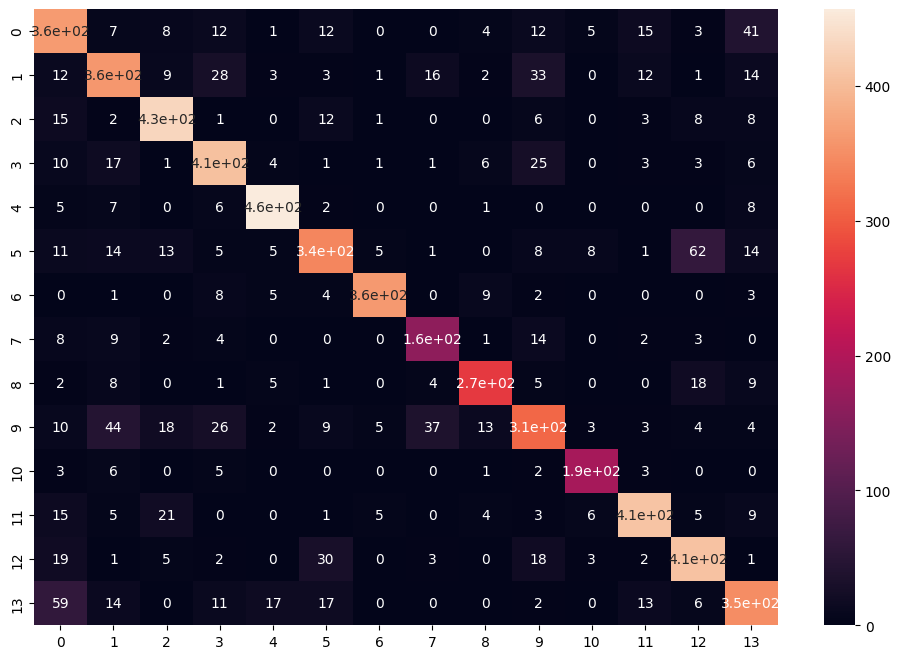

In [37]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(test_data.classes, predictions), annot=True)